In [11]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit
from scipy.stats import poisson

In [12]:
Q0 =fits.open('AS1T03_clean_Q0.lc')
Q1 =fits.open('AS1T03_clean_Q1.lc')
Q2 =fits.open('AS1T03_clean_Q2.lc')
Q3 =fits.open('AS1T03_clean_Q3.lc')

In [15]:
Q0_time = Q0[1].data['TIME']

Q0_rate = Q0[1].data['RATE']

Q1_time = Q1[1].data['TIME'][4200:4450]
Q1_rate = Q1[1].data['RATE'][4200:4450]

Q2_time = Q2[1].data['TIME'][4200:4450]
Q2_rate = Q2[1].data['RATE'][4200:4450]

Q3_time = Q3[1].data['TIME'][4200:4450]
Q3_rate = Q3[1].data['RATE'][4200:4450]

for i in range(len(Q0_rate)):
    print(Q0_rate[i],Q0_time[i])

128.8156 337196314.5
159.09442 337196315.5
142.84596 337196316.5
123.09514 337196317.5
151.28183 337196318.5
136.9185 337196319.5
145.61136 337196320.5
155.09564 337196321.5
139.43817 337196322.5
129.86095 337196323.5
150.66951 337196324.5
155.74254 337196325.5
149.75002 337196326.5
105.821625 337196327.5
163.39766 337196328.5
150.02777 337196329.5
119.33065 337196330.5
150.63002 337196331.5
136.93732 337196332.5
160.89752 337196333.5
155.01872 337196334.5
170.74457 337196335.5
129.41171 337196336.5
152.59909 337196337.5
158.4829 337196338.5
155.70573 337196339.5
146.52005 337196340.5
144.1861 337196341.5
140.91899 337196342.5
166.34273 337196343.5
181.6408 337196344.5
155.23114 337196345.5
148.88733 337196346.5
131.48064 337196347.5
165.67723 337196348.5
152.464 337196349.5
154.72293 337196350.5
114.466385 337196351.5
148.2804 337196352.5
115.063324 337196353.5
155.34212 337196354.5
149.48856 337196355.5
157.75616 337196356.5
133.62581 337196357.5
132.34433 337196358.5
141.67133 33719

133.4934 337197537.5
143.36598 337197538.5
126.31233 337197539.5
155.08107 337197540.5
129.7157 337197541.5
137.61026 337197542.5
119.4957 337197543.5
119.93826 337197544.5
140.03416 337197545.5
135.55772 337197546.5
133.8638 337197547.5
122.238815 337197548.5
123.776054 337197549.5
138.50847 337197550.5
127.5324 337197551.5
120.882515 337197552.5
128.17006 337197553.5
139.11752 337197554.5
134.16267 337197555.5
119.81363 337197556.5
138.9898 337197557.5
131.953 337197558.5
129.45297 337197559.5
111.73534 337197560.5
137.27498 337197561.5
138.03244 337197562.5
144.27666 337197563.5
132.71628 337197564.5
129.89882 337197565.5
126.70238 337197566.5
137.94392 337197567.5
126.90362 337197568.5
123.76725 337197569.5
134.76682 337197570.5
136.8724 337197571.5
122.36041 337197572.5
122.86971 337197573.5
76.33827 337197574.5
144.10924 337197575.5
138.3405 337197576.5
131.08224 337197577.5
123.087456 337197578.5
145.32986 337197579.5
136.73984 337197580.5
123.55346 337197581.5
124.057434 337197

127.56643 337198787.5
110.72236 337198788.5
105.09814 337198789.5
132.11002 337198790.5
125.02459 337198791.5
93.34716 337198792.5
151.95535 337198793.5
120.62063 337198794.5
103.01822 337198795.5
126.81574 337198796.5
131.02025 337198797.5
112.330956 337198798.5
120.50327 337198799.5
125.6767 337198800.5
139.53622 337198801.5
131.2943 337198802.5
112.11787 337198803.5
115.414116 337198804.5
117.17143 337198805.5
128.75465 337198806.5
152.48706 337198807.5
114.60388 337198808.5
133.87614 337198809.5
104.49437 337198810.5
117.715324 337198811.5
117.75767 337198812.5
121.958664 337198813.5
126.49609 337198814.5
136.47037 337198815.5
132.58026 337198816.5
138.67976 337198817.5
123.66287 337198818.5
127.450935 337198819.5
130.92798 337198820.5
136.01317 337198821.5
149.37679 337198822.5
117.87073 337198823.5
100.820015 337198824.5
114.971275 337198825.5
131.17833 337198826.5
116.59939 337198827.5
144.08977 337198828.5
139.89992 337198829.5
129.99486 337198830.5
133.94556 337198831.5
98.488

121.4192 337200286.5
145.82195 337200287.5
110.92919 337200288.5
125.47048 337200289.5
120.01303 337200290.5
100.1709 337200291.5
131.53143 337200292.5
97.30128 337200293.5
125.23705 337200294.5
120.86971 337200295.5
128.17151 337200296.5
109.59151 337200297.5
128.733 337200298.5
103.41995 337200299.5
138.35172 337200300.5
136.98062 337200301.5
119.50218 337200302.5
134.80338 337200303.5
108.736435 337200304.5
130.59648 337200305.5
112.35129 337200306.5
116.48307 337200307.5
118.02991 337200308.5
98.87412 337200309.5
136.23186 337200310.5
106.83596 337200311.5
120.601776 337200312.5
119.81424 337200313.5
108.88102 337200314.5
144.71498 337200315.5
124.563034 337200316.5
121.357956 337200317.5
130.05435 337200318.5
141.18515 337200319.5
130.50336 337200320.5
131.23201 337200321.5
127.01994 337200322.5
120.11807 337200323.5
121.779175 337200324.5
132.58485 337200325.5
102.64561 337200326.5
113.46529 337200327.5
133.90329 337200328.5
105.04877 337200329.5
119.78261 337200330.5
110.93822 3

146.90663 337201786.5
151.88841 337201787.5
154.63669 337201788.5
141.60023 337201789.5
130.09607 337201790.5
142.23381 337201791.5
131.63777 337201792.5
143.94052 337201793.5
146.59697 337201794.5
132.98203 337201795.5
138.32124 337201796.5
121.23684 337201797.5
162.5607 337201798.5
133.92365 337201799.5
132.85176 337201800.5
121.48207 337201801.5
134.99753 337201802.5
126.96376 337201803.5
144.38918 337201804.5
124.36621 337201805.5
146.42583 337201806.5
121.630936 337201807.5
148.14337 337201808.5
129.58119 337201809.5
126.88777 337201810.5
127.03928 337201811.5
148.99728 337201812.5
131.36757 337201813.5
129.40771 337201814.5
166.86449 337201815.5
135.92938 337201816.5
130.12274 337201817.5
141.00893 337201818.5
135.8599 337201819.5
148.46063 337201820.5
152.73308 337201821.5
134.9532 337201822.5
130.60596 337201823.5
137.9785 337201824.5
153.66635 337201825.5
120.820915 337201826.5
132.86668 337201827.5
120.33332 337201828.5
138.52228 337201829.5
133.00543 337201830.5
136.43843 33

136.15865 337203536.5
131.25455 337203537.5
111.20787 337203538.5
115.170425 337203539.5
121.61743 337203540.5
122.94677 337203541.5
133.04979 337203542.5
126.00647 337203543.5
143.18652 337203544.5
108.320496 337203545.5
113.93362 337203546.5
142.23901 337203547.5
120.57044 337203548.5
134.34561 337203549.5
143.83063 337203550.5
122.13169 337203551.5
142.05672 337203552.5
132.70277 337203553.5
145.5947 337203554.5
152.12814 337203555.5
126.583 337203556.5
147.24664 337203557.5
153.70493 337203558.5
132.98093 337203559.5
126.39419 337203560.5
133.08698 337203561.5
126.2669 337203562.5
129.49802 337203563.5
116.082924 337203564.5
142.83191 337203565.5
140.80157 337203566.5
140.01878 337203567.5
128.30487 337203568.5
118.3313 337203569.5
126.31341 337203570.5
158.40077 337203571.5
119.70052 337203572.5
139.32779 337203573.5
92.74038 337203574.5
100.74383 337203575.5
118.92158 337203576.5
122.19755 337203577.5
117.7384 337203578.5
123.83298 337203579.5
132.83934 337203580.5
124.29703 3372

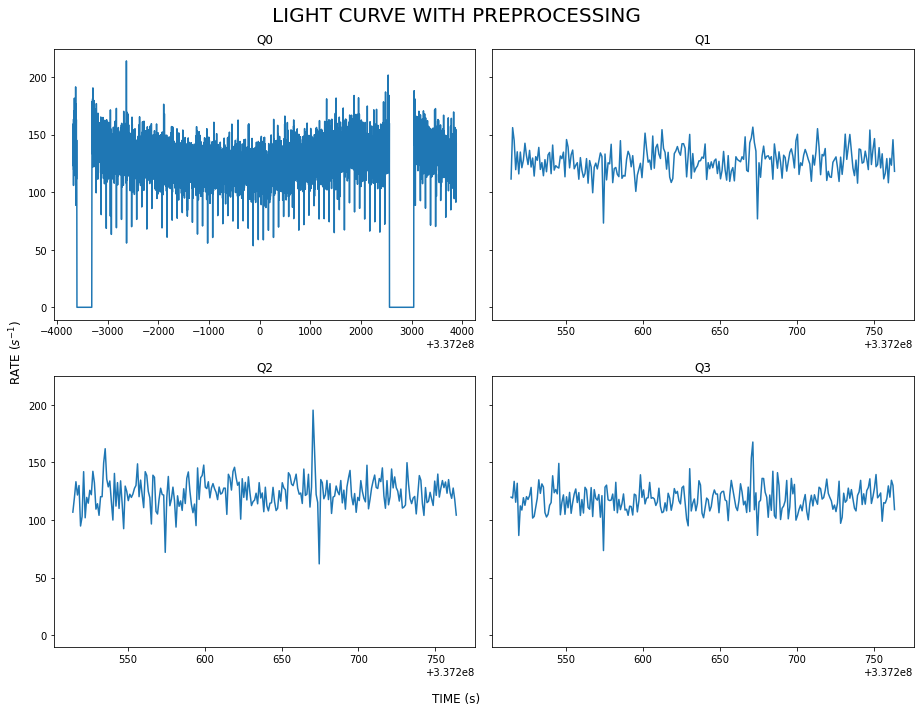

In [16]:
figure, axis = plt.subplots(2, 2, figsize=(13, 10), sharey=True)

figure.suptitle('LIGHT CURVE WITH PREPROCESSING',fontsize=20)
axis[0, 0].plot(Q0_time , Q0_rate)
axis[0, 0].set_title("Q0")

axis[0, 1].plot(Q1_time , Q1_rate)
axis[0, 1].set_title("Q1")

axis[1, 0].plot(Q2_time , Q2_rate)
axis[1, 0].set_title("Q2")

axis[1, 1].plot(Q3_time , Q3_rate)
axis[1, 1].set_title("Q3")

figure.supxlabel('TIME (s)')
figure.supylabel('RATE ($s^{-1}$)')
plt.tight_layout()

### Plot Funciton

In [42]:
def plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
           Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data):
    figure, axis = plt.subplots(4, 2, figsize=(15, 15))
    figure.suptitle('DETRENDING WITH SAVGOL FILTER',fontsize=20)
    axis[0, 0].plot(Q0_time, Q0_rate, label = 'Light Curve')
    axis[0, 0].plot(Q0_time, Q0_trend, label = 'Trend')
    axis[0, 0].legend(loc='best')
    axis[0, 0].set_title("Q0")
    axis[0, 1].plot(Q0_time, Q0_detrend_data, label = 'Detrended Curve')
    axis[0, 1].legend(loc='best')
    axis[0, 1].set_title("Q0_detrended")

    axis[1, 0].plot(Q1_time, Q1_rate, label = 'Light Curve')
    axis[1, 0].plot(Q1_time, Q1_trend, label = 'Trend')
    axis[1, 0].legend(loc='best')
    axis[1, 0].set_title("Q0")
    axis[1, 1].plot(Q1_time, Q1_detrend_data, label = 'Detrended Curve')
    axis[1, 1].legend(loc='best')
    axis[1, 1].set_title("Q1_detrended")

    axis[2, 0].plot(Q2_time, Q2_rate, label = 'Light Curve')
    axis[2, 0].plot(Q2_time, Q2_trend, label = 'Trend')
    axis[2, 0].legend(loc='best')
    axis[2, 0].set_title("Q0")
    axis[2, 1].plot(Q2_time, Q2_detrend_data, label = 'Detrended Curve')
    axis[2, 1].legend(loc='best')
    axis[2, 1].set_title("Q2_detrended")

    axis[3, 0].plot(Q3_time, Q3_rate, label = 'Light Curve')
    axis[3, 0].plot(Q3_time, Q3_trend, label = 'Trend')
    axis[3, 0].legend(loc='best')
    axis[3, 0].set_title("Q0")
    axis[3, 1].plot(Q3_time, Q3_detrend_data, label = 'Detrended Curve')
    axis[3, 1].legend(loc='best')
    axis[3, 1].set_title("Q3_detrended")
    plt.savefig("Detrend curve with SAVGOL filter.jpg")
    plt.tight_layout()

### SNR (S-B)/std function

In [43]:
def SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data):    
    
    print('(S-B)/std SNR')
    Q0_rate_max_ind = np.argmax(Q0_detrend_data)
    Q0_noise = np.concatenate((Q0_detrend_data[:Q0_rate_max_ind-300],Q0_detrend_data[Q0_rate_max_ind+300:]))
    Q0_mean , Q0_std = np.mean(Q0_noise) , np.std(Q0_noise)
    Q0_SNR = (max(Q0_detrend_data)-Q0_mean)/Q0_std
    print('Q0 SNR = ',Q0_SNR)

    Q1_rate_max_ind = np.argmax(Q1_detrend_data)
    Q1_noise = np.concatenate((Q1_detrend_data[:Q1_rate_max_ind-300],Q1_detrend_data[Q1_rate_max_ind+300:]))
    Q1_mean , Q1_std = np.mean(Q1_noise) , np.std(Q1_noise)
    Q1_SNR = (max(Q1_detrend_data)-Q1_mean)/Q1_std
    print('Q1 SNR = ',Q1_SNR)

    Q2_rate_max_ind = np.argmax(Q2_detrend_data)
    Q2_noise = np.concatenate((Q2_detrend_data[:Q2_rate_max_ind-300],Q2_detrend_data[Q2_rate_max_ind+300:]))
    Q2_mean , Q2_std = np.mean(Q2_noise) , np.std(Q2_noise)
    Q2_SNR = (max(Q2_detrend_data)-Q2_mean)/Q2_std
    print('Q2 SNR = ',Q2_SNR)

    Q3_rate_max_ind = np.argmax(Q3_detrend_data)
    Q3_noise = np.concatenate((Q3_detrend_data[:Q3_rate_max_ind-300],Q3_detrend_data[Q3_rate_max_ind+300:]))
    Q3_mean , Q3_std = np.mean(Q3_noise) , np.std(Q3_noise)
    Q3_SNR = (max(Q3_detrend_data)-Q3_mean)/Q3_std
    print('Q3 SNR = ',Q3_SNR)

### Noise extraction Fucntions

In [44]:
def get_noise_with_mean(rate):
    SA_w_start, SA_w_end = np.where(rate==0)[0][0], np.where(rate==0)[0][-1]
    rate_max_ind = np.argmax(rate)
    GRB_start, GRB_end = rate_max_ind-300, rate_max_ind+300
    noise = np.concatenate([rate[:GRB_start], rate[GRB_end:SA_w_start], rate[SA_w_end:]])
    noise_mean= np.mean(noise)
    noise = np.concatenate([rate[:GRB_start], [noise_mean]*(GRB_end-GRB_start),
                              rate[GRB_end:SA_w_start], [0]*(SA_w_end-SA_w_start),rate[SA_w_end:]])
    return noise

def get_noise(rate0,rate):
    SA_w_start, SA_w_end = np.where(rate0==0)[0][0], np.where(rate0==0)[0][-1]
    rate_max_ind = np.argmax(rate0)
    GRB_start, GRB_end = rate_max_ind-30, rate_max_ind+30
    noise = np.concatenate([rate[:GRB_start], rate[GRB_end:SA_w_start], rate[SA_w_end:]])
    return noise


### Mean Filter

In [45]:
def mean_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,plot):
    Q0_noise = get_noise_with_mean(Q0_rate)
    Q0_mfilter = [0]*len(Q0_noise)
    windows_size=80
    for i in range(0,len(Q0_noise),windows_size):
        Q0_mfilter[i:i+windows_size] = [np.mean(Q0_noise[i:i+windows_size])]*windows_size
    Q0_trend=Q0_mfilter[:7240]
    Q0_detrend_data = Q0_rate-Q0_trend

    Q1_noise = get_noise_with_mean(Q1_rate)
    Q1_mfilter = [0]*len(Q1_noise)
    for i in range(0,len(Q1_noise),windows_size):
        Q1_mfilter[i:i+windows_size] = [np.mean(Q1_noise[i:i+windows_size])]*windows_size
    Q1_trend=Q1_mfilter[:7240]
    Q1_detrend_data = Q1_rate-Q1_trend

    Q2_noise = get_noise_with_mean(Q2_rate)
    Q2_mfilter = [0]*len(Q2_noise)
    for i in range(0,len(Q2_noise),windows_size):
        Q2_mfilter[i:i+windows_size] = [np.mean(Q2_noise[i:i+windows_size])]*windows_size
    Q2_trend=Q2_mfilter[:7240]
    Q2_detrend_data = Q2_rate-Q2_trend

    Q3_noise = get_noise_with_mean(Q3_rate)
    Q3_mfilter = [0]*len(Q3_noise)
    for i in range(0,len(Q3_noise),windows_size):
        Q3_mfilter[i:i+windows_size] = [np.mean(Q3_noise[i:i+windows_size])]*windows_size
    Q3_trend=Q3_mfilter[:7240]
    Q3_detrend_data = Q3_rate-Q3_trend

    if plot=='YES':
        plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
               Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data)

    return Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data

### Median Filter

In [46]:
def median_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,plot):
    Q0_noise = get_noise_with_mean(Q0_rate)
    Q0_mfilter = [0]*len(Q0_noise)
    windows_size=80
    for i in range(0,len(Q0_noise),windows_size):
        Q0_mfilter[i:i+windows_size] = [np.median(Q0_noise[i:i+windows_size])]*windows_size
    Q0_trend=Q0_mfilter[:7240]
    Q0_detrend_data = Q0_rate-Q0_trend

    Q1_noise = get_noise_with_mean(Q1_rate)
    Q1_mfilter = [0]*len(Q1_noise)
    for i in range(0,len(Q1_noise),windows_size):
        Q1_mfilter[i:i+windows_size] = [np.median(Q1_noise[i:i+windows_size])]*windows_size
    Q1_trend=Q1_mfilter[:7240]
    Q1_detrend_data = Q1_rate-Q1_trend

    Q2_noise = get_noise_with_mean(Q2_rate)
    Q2_mfilter = [0]*len(Q2_noise)
    for i in range(0,len(Q2_noise),windows_size):
        Q2_mfilter[i:i+windows_size] = [np.median(Q2_noise[i:i+windows_size])]*windows_size
    Q2_trend=Q2_mfilter[:7240]
    Q2_detrend_data = Q2_rate-Q2_trend

    Q3_noise = get_noise_with_mean(Q3_rate)
    Q3_mfilter = [0]*len(Q3_noise)
    for i in range(0,len(Q3_noise),windows_size):
        Q3_mfilter[i:i+windows_size] = [np.median(Q3_noise[i:i+windows_size])]*windows_size
    Q3_trend=Q3_mfilter[:7240]
    Q3_detrend_data = Q3_rate-Q3_trend

    if plot=='YES':
        plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
               Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data)

    return Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data

### Savgol Filter

In [47]:
def savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,plot):
    print('SAVGOL FILTER')
    window_length = 100
    polyorder=5

    Q0_noise = get_noise_with_mean(Q0_rate)
    Q0_trend = signal.savgol_filter(Q0_noise , window_length, polyorder)
    Q0_detrend_data = Q0_rate-Q0_trend

    Q1_noise = get_noise_with_mean(Q1_rate)
    Q1_trend = signal.savgol_filter(Q1_noise , window_length, polyorder)
    Q1_detrend_data = Q1_rate-Q1_trend

    Q2_noise = get_noise_with_mean(Q2_rate)
    Q2_trend = signal.savgol_filter(Q2_noise , window_length, polyorder)
    Q2_detrend_data = Q2_rate-Q2_trend

    Q3_noise = get_noise_with_mean(Q3_rate)
    Q3_trend = signal.savgol_filter(Q3_noise , window_length, polyorder)
    Q3_detrend_data = Q3_rate-Q3_trend
    
    if plot=='YES':
        plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
               Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data)

    return Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data

### Gausian SNR

In [48]:
def gauss_func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def Gausian_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data):   
    
    print('GAUSSIAN SNR')
    Q0_noise = get_noise(Q0_rate,Q0_detrend_data)
    n, bins = np.histogram(Q0_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q0 SNR = ',abs((max(Q0_detrend_data))/(popt[1]+3*popt[2])))
    
    Q1_noise = get_noise(Q1_rate,Q1_detrend_data)
    n, bins = np.histogram(Q1_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q1 SNR = ',abs((max(Q1_detrend_data))/(popt[1]+3*popt[2])))
    
    Q2_noise = get_noise(Q2_rate,Q2_detrend_data)
    n, bins = np.histogram(Q2_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q2 SNR = ',abs((max(Q2_detrend_data))/(popt[1]+3*popt[2])))
    
    Q3_noise = get_noise(Q3_rate,Q3_detrend_data)
    n, bins = np.histogram(Q3_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q3 SNR = ',abs((max(Q3_detrend_data))/(popt[1]+3*popt[2])))

In [49]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'N')
SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

SAVGOL FILTER
(S-B)/std SNR
Q0 SNR =  50.441522042443374
Q1 SNR =  51.22764772337792
Q2 SNR =  51.912852588906524
Q3 SNR =  47.81280919669109


In [50]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'N')
Gausian_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

SAVGOL FILTER
GAUSSIAN SNR
Q0 SNR =  18.58229422214216
Q1 SNR =  18.399235697007732
Q2 SNR =  18.482426602258872
Q3 SNR =  17.355230291288787


### Poisson SNR

In [60]:
def poisson_func(x, x0):
    return poisson.pmf(x,x0)

def Poisson_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data):   
    
    print('Poisson SNR')
    Q0_noise = get_noise(Q0_rate,Q0_detrend_data)
    Q0_noise_off = Q0_noise+100
    n, bins = np.histogram(Q0_noise_off, bins=80,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q0_noise_off)])
    xplot = np.arange(36,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q0 SNR = ',((max(Q0_detrend_data))/(popt[0]+3*h))*10)
    
    Q1_noise = get_noise(Q1_rate,Q1_detrend_data)
    Q1_noise_off = Q1_noise+100
    n, bins = np.histogram(Q1_noise_off, bins=80,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q1_noise_off)])
    xplot = np.arange(36,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q1 SNR = ',((max(Q1_detrend_data))/(popt[0]+3*h))*10)
    
    Q2_noise = get_noise(Q2_rate,Q2_detrend_data)
    Q2_noise_off = Q2_noise+100
    n, bins = np.histogram(Q2_noise_off, bins=80,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q2_noise_off)])
    xplot = np.arange(36,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q2 SNR = ',((max(Q2_detrend_data))/(popt[0]+3*h))*10)
    
    Q3_noise = get_noise(Q3_rate,Q3_detrend_data)
    Q3_noise_off = Q3_noise+100
    n, bins = np.histogram(Q3_noise_off, bins=80,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    xplot = np.arange(36,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q3 SNR = ',((max(Q3_detrend_data))/(popt[0]+3*h))*10)

In [57]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'N')
Poisson_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

SAVGOL FILTER
Poisson SNR
Q0 SNR =  599.9297192440988
Q1 SNR =  600.5211243061183
Q2 SNR =  596.5281918603501
Q3 SNR =  546.3088710486262


SAVGOL FILTER


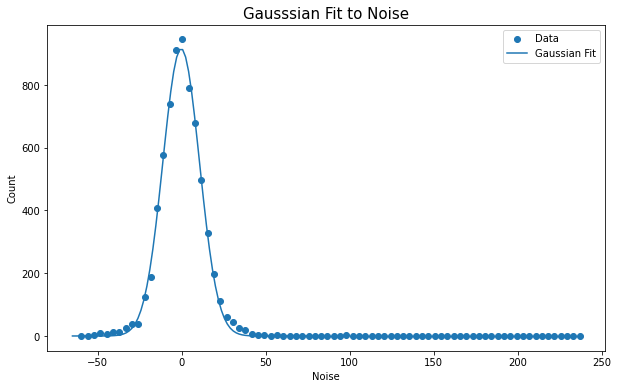

In [58]:
def gauss_func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'N')
Q0_noise = get_noise(Q0_rate,Q0_detrend_data)
n, bins = np.histogram(Q0_noise, bins=80)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
popt, pcov = curve_fit(gauss_func,bin_centers,n)
xplot = np.linspace(-65,75,len(bin_centers))
plt.figure(figsize=(10,6))
plt.title('Gausssian Fit to Noise',fontsize=15)
plt.scatter(bin_centers,n,label='Data')
plt.plot(xplot,gauss_func(xplot,popt[0],popt[1],popt[2]),label='Gaussian Fit')
plt.xlabel('Noise')
plt.ylabel('Count')
plt.legend(loc='best')
plt.savefig('Gausssian Fit.jpeg')

SAVGOL FILTER
6816
0.3331285088869792 3.001844553446098
100.17927981486339


/home/rahul/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


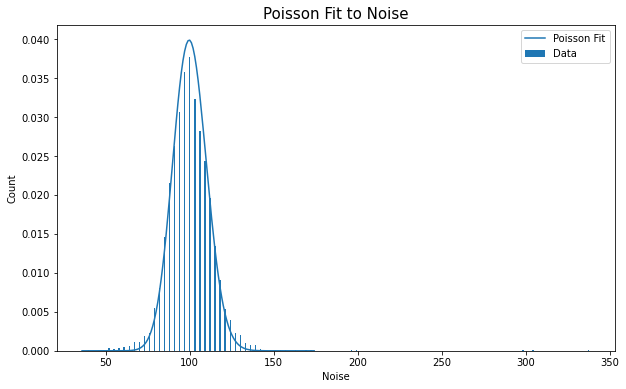

In [54]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,
                                                                                   Q2_rate,Q3_rate,'NO')

def poisson_func(x, x0):
    return poisson.pmf(x,x0)

Q0_noise = get_noise(Q0_rate,Q0_detrend_data)
print(len(Q0_noise))

Q0_noise_off = Q0_noise+100
n, bins = np.histogram(Q0_noise_off, bins=100,density=True)
print(sum(n),bins[1]-bins[0])
bin_centers = 0.5 * (bins[1:] + bins[:-1])
popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q0_noise_off)])
print(popt[0])
xplot = np.arange(36,175)
plt.figure(figsize=(10,6))
plt.title('Poisson Fit to Noise',fontsize=15)
plt.bar(bin_centers,n,label='Data')
plt.plot(xplot,poisson_func(xplot,popt[0]),label='Poisson Fit')
plt.xlabel('Noise')
plt.ylabel('Count')
plt.legend(loc='best')
plt.savefig('Poisson Fit')

In [61]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'N')
SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)
Gausian_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)
Poisson_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

SAVGOL FILTER
(S-B)/std SNR
Q0 SNR =  50.441522042443374
Q1 SNR =  51.22764772337792
Q2 SNR =  51.912852588906524
Q3 SNR =  47.81280919669109
GAUSSIAN SNR
Q0 SNR =  18.58229422214216
Q1 SNR =  18.399235697007732
Q2 SNR =  18.482426602258872
Q3 SNR =  17.355230291288787
Poisson SNR
Q0 SNR =  59.99297192440988
Q1 SNR =  60.05211243061183
Q2 SNR =  59.65281918603502
Q3 SNR =  54.630887104862616
